# Приоритизация гипотез, запуск  и анализ результатов A/B-тестов.

Мы работаем в  крупном интернет магазине. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Задачей данного проекта явлется расставить приоритеты для выдвинутых гипотез, проанализировать результаты проведеннх А/В тестов.
План работы:
1. Изучим общую информацию файлов с данными
Проведем при необходимости предобработку данных (заменим названия столюцов, приведем в соотвтествие типы данных, обработаем пропуски, создадим новые столбцы...).
2. Расставим приоритеты для выдвинутых гипотез.
- Применим фреймворк ICE для приоритизации гипотез.
- Применим фреймворк RICE для приоритизации гипотез.
- Выясним изменится ли приоритизация гипотез при применении RICE вместо ICE.
3. Проанализирем A/B-тесты.
- Построим график кумулятивной выручки по группам.
- Построим график кумулятивного среднего чека по группам.
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
- Построим график кумулятивного среднего количества заказов на посетителя по группам.
  Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
- Построим точечный график количества заказов по пользователям.
- Построим 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
- Построим точечный график стоимостей заказов.
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
4. Примем решение по результатам теста и объясним его.

## Открытие файла с данными и изучение общей информацию о данных

### Открытие файлов

импортируем необходимы для работы библиотеки и откроем файлы

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import scipy.stats as stats
import datetime as dt
import warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
warnings.filterwarnings("ignore")

In [ ]:
try:
  # смотрим есть ли локально файл
  hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
  # если же его нет
  hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [ ]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
except:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [ ]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

### Изучение общей информации и предобработка таблицы hypothesis.

In [ ]:
# посмотрим размер таблицы
hypothesis.shape

(9, 5)

In [ ]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
# таблица не большая выведем сразу все записи
pd.set_option('display.max_columns', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Вывод: Типы данных все верные, пропусков нет. Можно только привести названия столбцов в правильный регистр.

In [ ]:
hypothesis.columns = hypothesis.columns.str.lower()

### Изучение общей информации и предобработка таблицы orders.

In [ ]:
# посмотрим размер таблицы
orders.shape

(1197, 5)

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
# выведем первые 5 записей
pd.set_option('display.max_columns', None)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# Проверим таблицу orders на дубликаты
orders.duplicated().sum()

0

Вывод: Названия столбцов корректные, пропусков и дубликатов в данных нет. Тип поля date нужно привести в правильный формат.

In [ ]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Изучение общей информации и предобработка таблицы visitors.

In [ ]:
# посмотрим размер таблицы
visitors.shape

(62, 3)

In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
# Проверим таблицу visitors на дубликаты
visitors.duplicated().sum()

0

Вывод: Названия полей в порядке, пропусков и дубликатов нет. Но следует поментять тип поля date.

In [ ]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Дополнительный анализ данных для исследования.

In [ ]:
# посмотрим какие группы есть в данных и количество пользователей в каждой группе
orders.groupby(['group']).count()

,transactionId,visitorId,date,revenue
group,,,,
A,557,557,557,557
B,640,640,640,640


In [ ]:
# дата начала и окончания теста
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [ ]:
# Количество пользователей
print(
    f"Всего {sum(visitors['visitors'])} за август 2019 года. "
    f"Из них {len(orders['visitorId'].unique())} уникальный пользователь сделал заказ."
)

Всего 37652 за август 2019 года. Из них 1031 уникальный пользователь сделал заказ.


In [ ]:
visitorsA = set(orders[(orders['group'] == 'A')]['visitorId'])
visitorsB = set(orders[(orders['group'] == 'B')]['visitorId'])
visitors_АВ = visitorsA.intersection(visitorsB)
print(visitors_АВ)

{3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 2954449915, 1316129916, 477780734, 3972127743}


In [ ]:
print(f"Вероятность попадания пользователей в обе группы {round(len(visitors_АВ)/len(orders['visitorId'].unique()) * 100, 2)} %")

Вероятность попадания пользователей в обе группы 5.63 %


***ВЫВОД:*** В первом пункте были загружены и обработаны три таблицы. В таблицах orders и visitors был изменен тип данных поля date. Остальные данные корректны и таблицы готовы для анализа.

Дополнительно проанализировали следующие данные:

Количество групп в АВ-тесте всего две А и В;

Даты начала и окончания теста - данные предоставлены за август 2019 года ;

Количество пользователей в каждой группе - по таблице с заказами: в группе А 557, в группе В 640 ;

Вероятность попадания пользователей в обе группы - по таблице с заказами 5.63%

Получается некоторые пользователи попали в обе группы и данные не очень достоверны. Процент погрешности укладывается в 5-10 % процентов поэтому думаю можно пересекающихся пользователей не удалять.

## Расставим приоритеты для выдвинутых гипотез

### Применим фреймворк ICE для приоритизации гипотез.

In [ ]:
pd.set_option('display.max_colwidth', 300)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
# Применим фреймворк ICE
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)

In [ ]:
pd.set_option('display.max_colwidth', 300)
# Отсортируем  по убыванию приоритета
display(hypothesis[['ICE', 'hypothesis']].sort_values(by='ICE', ascending=False))

,ICE,hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.3,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


### Применим фреймворк RICE для приоритизации гипотез.

In [ ]:
# Применим фреймворк RICE
hypothesis['RICE'] = (hypothesis['reach']  *hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [ ]:
pd.set_option('display.max_colwidth', 300)
# Отсортируем  по убыванию приоритета
hypothesis[['RICE', 'hypothesis', 'reach']].sort_values(by='RICE', ascending=False)

,RICE,hypothesis,reach
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения",1
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


***ВЫВОД:*** Выше из таблиц видим, что при применении RICE вместо ICE есть различия. Для ICE тройка лидеров это гипотезы: Запустить акцию, дающую скидку на товар в день рождения(8), Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0), Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7).

Для RICE: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7), Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2), Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0). Гипотезы Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0) и Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7) остаются в тройке лидеров но меняют позиции, а вот гипотеза Запустить акцию, дающую скидку на товар в день рождения(8) смещается на 5 место. Зато гипотеза под номером Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2) с 5 поднимается на 2.  При применении фреймворка  RICE мы учитываем параметр Reach, который отвечает за охват пользователей, которых затронет изменение и у гипотез Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7) и Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2) он самый большой, поэтому считаю что проверять стоит гипотезы Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7) и Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2).

## Проанализирем A/B-тесты

### Построим график кумулятивной выручки по группам

In [ ]:
# посчитаем медианную выручку в каждой группе
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

In [ ]:
# обьединим visitors и orders в comDF

Group = orders[['date','group']].drop_duplicates()

ordersAgg = Group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max',
                                          'group' : 'max',
                                          'transactionId' : pd.Series.nunique,
                                          'visitorId' : pd.Series.nunique,
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAgg = Group.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max',
                                            'group' : 'max',
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumDF = ordersAgg.merge(visitorsAgg, left_on=['date', 'group'], right_on=['date', 'group'])
cumDF.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumDF.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по группам


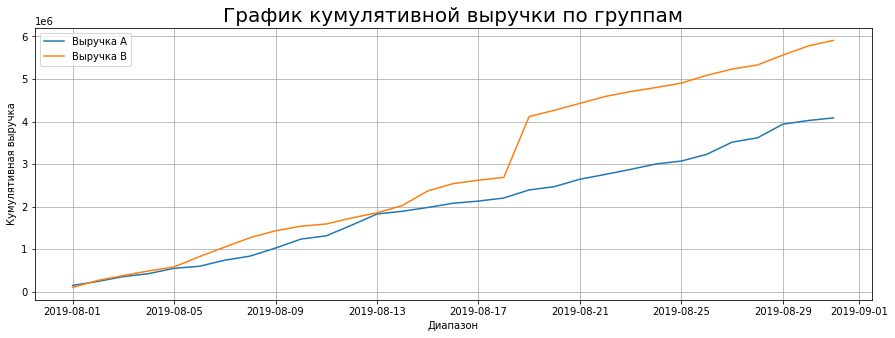

In [ ]:
cumA = cumDF[cumDF['group']=='A'][['date','revenue', 'orders','visitors']]
cumB = cumDF[cumDF['group']=='B'][['date','revenue', 'orders','visitors']]
plt.figure(figsize=(15,5))
plt.plot(cumA['date'], cumA['revenue'], label='Выручка A')
plt.plot(cumB['date'], cumB['revenue'], label='Выручка B')
plt.title('График кумулятивной выручки по группам', fontsize=20)
plt.ylabel('Кумулятивная выручка', fontsize=10)
plt.xlabel('Диапазон', fontsize=10)
plt.grid()
plt.legend();

***ВЫВОД:*** На графике видим, что с 01.08 до 13.08 выручки обе растут, но в группе В чуть быстрей. 13.08 выручки одинаковые и потом выручка группы В обгоняет выручку группы А, особенно после 19.08. Возможно там был большой заказ.

### Построим график кумулятивного среднего чека по группам.

Чтобы построить график нужно получить для него данные, для этого разделим выручку на число заказов по группам

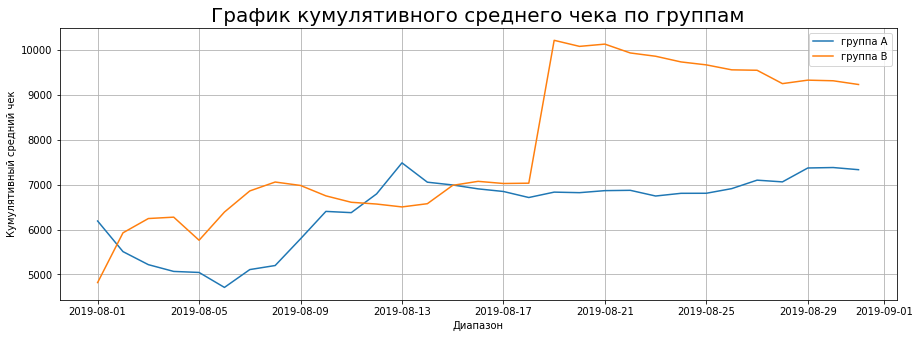

In [ ]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumA['date'], cumA['revenue']/cumA['orders'], label='группа A')
plt.plot(cumB['date'], cumB['revenue']/cumB['orders'], label='группа B')
plt.title('График кумулятивного среднего чека по группам', fontsize=20)
plt.ylabel('Кумулятивный средний чек', fontsize=10)
plt.xlabel('Диапазон', fontsize=10)
plt.legend();

***ВЫВОД:*** На графике видим, что до 11.08 средний чек группы В больше, потом на несколько дней средний чек группы А становится больше чека группы В. 15.08 чеки одинакоые и после этого средний чек группы А практически стабилен и растет совсем не значительно. У группы В видим резкий скачок в размере чека, по после 19.08 наблюдается его падение, хотя он стабильно больше среднего чека группы А.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Чтобы построить график нужно объединить данные.

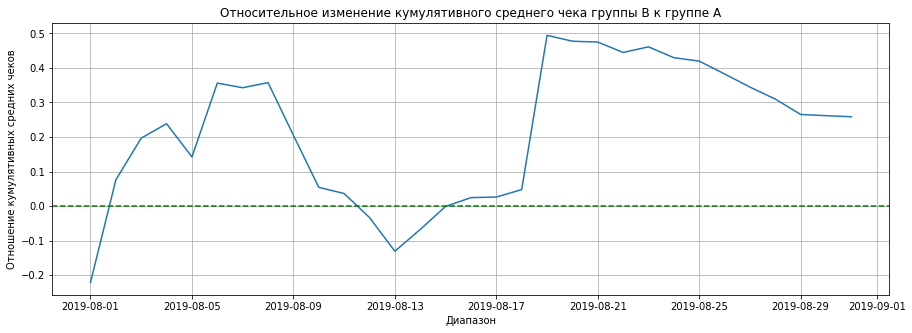

In [ ]:
CumAB = cumA.merge(cumB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(CumAB['date'], (CumAB['revenueB']/CumAB['ordersB'])/ \
         (CumAB['revenueA']/CumAB['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')
plt.ylabel('Отношение кумулятивных средних чеков', fontsize=10)
plt.xlabel('Диапазон', fontsize=10)
plt.axhline(y=0, color='green', linestyle='--') ;

***ВЫВОД:***
На этом графике видим тоже самое что и на предидущем. Средний чек В превышает А до 11-12.08, Потом после 15 начинает опять обгонять средний чек А. 19 числа большой всплеск от возможного большого заказа и потом плавное снижение среднего чека.    

Здесь наверно следует посмотреть какие всетаки заказы были в районе 18-19.08, т.к. на всех трех графиках мы видим всплеск.

In [ ]:
cumB.query(' "2019-08-16" <= date <= "2019-08-22" ')

,date,revenue,orders,visitors
31,2019-08-16,2539635,359,10013
33,2019-08-17,2620790,373,10434
35,2019-08-18,2686621,382,11171
37,2019-08-19,4116541,403,11658
39,2019-08-20,4263815,423,12218
41,2019-08-21,4426892,437,12874
43,2019-08-22,4589247,462,13524


Количество заказов как и в другие дни, посчитаем среднее значение одного заказа на 19.08

In [ ]:
print('Среднее на 19.08 =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(8)

Среднее на 19.08 = 2630.0


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A


В таблице видим что один заказ 425 был гораздо больше среднего. Скорей всего это выбросное значение.

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

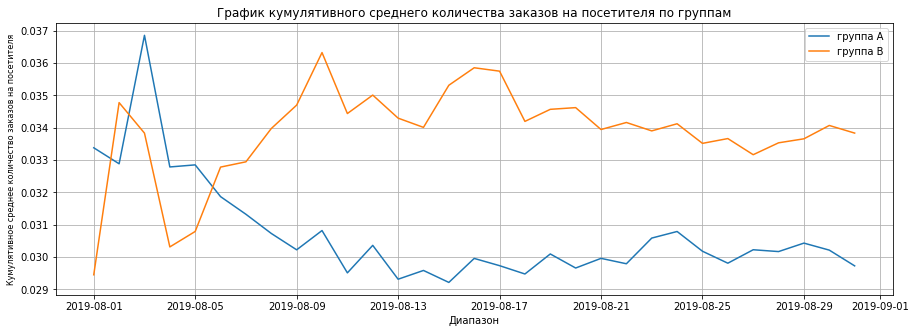

In [ ]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumA['date'], cumA['orders']/cumA['visitors'], label='группа A')
plt.plot(cumB['date'], cumB['orders']/cumB['visitors'], label='группа B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя', fontsize=8)
plt.xlabel('Диапазон', fontsize=10)
plt.legend();

***ВЫВОД:*** На графике видим, что с 1.08 лидером по количеству заказов на посетителя была группа А, но после 6.08 количество заказов группы В резко пошло вверх, а у группы А вниз. и с 9.8 стабильно группа В значительно опережает группу В по количеству заказов на посетителя.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

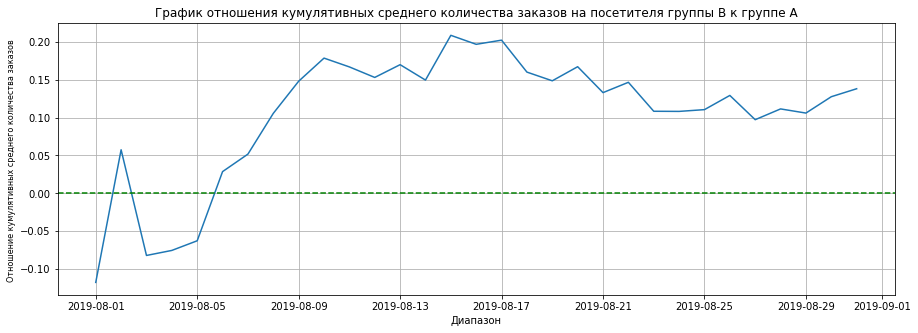

In [ ]:
CumAB_order = cumA.merge(cumB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(CumAB_order['date'], (CumAB_order['ordersB']/CumAB_order['visitorsB'])/ \
         (CumAB_order['ordersA']/CumAB_order['visitorsA'])-1)
plt.title('График отношения кумулятивных среднего количества заказов на посетителя группы В к группе А')
plt.ylabel('Отношение кумулятивных среднего количества заказов ', fontsize=8)
plt.xlabel('Диапазон', fontsize=10)
plt.axhline(y=0, color='green', linestyle='--') ;

***ВЫВОД:*** На этом графике видим тоже самое что и на предидущем. Среднее количество заказов на посетителя группы В к группе А ниже только вначале со 2.08 по 6.08, а потом резко идет ввер и практически не снижается.

### Построим точечный график количества заказов по пользователям.

In [ ]:
orderUser = (
    orders
    .groupby(by=['visitorId'])
    .agg({'transactionId': 'count'})
    .rename(columns={'transactionId': 'orders_count'})
    .reset_index()
)

In [ ]:
orderUser

,visitorId,orders_count
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


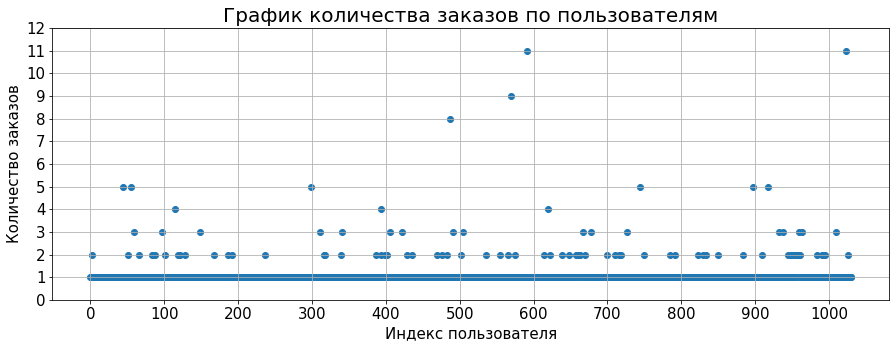

In [ ]:
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0, len(orderUser['orders_count'])))
plt.scatter(x_values, orderUser['orders_count'])
plt.title('График количества заказов по пользователям', fontsize=20)
plt.ylabel('Количество заказов', fontsize=15)
plt.xlabel('Индекс пользователя', fontsize=15)
plt.xticks(np.arange(min(x_values), max(x_values), 100))
plt.xticks(fontsize=15)
plt.yticks(np.arange(min(orderUser['orders_count']) - 1, max(orderUser['orders_count']) + 2, 1))
plt.yticks(fontsize=15)
plt.grid()
plt.show()

***ВЫВОД:*** На графике видим, что больше всего пользователей совершали по одному заказу, на втором месте по 2 заказа, есть такие кто совершал 3-4 заказаза и даже от 5 до 11. Но скорей всего все что выше 4 это аномалия и их нужно отсекать.

### Построим 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [ ]:
print(np.percentile(orderUser['orders_count'], [95, 97.5, 99]))

[2. 3. 4.]


***ВЫВОД:*** Теперь видно, что большинство пользователей делают 1 или 2 заказа и можно отсекать значения количества заказов, превышающих 3.

### Построим точечный график стоимостей заказов c аномальными значениями и без.

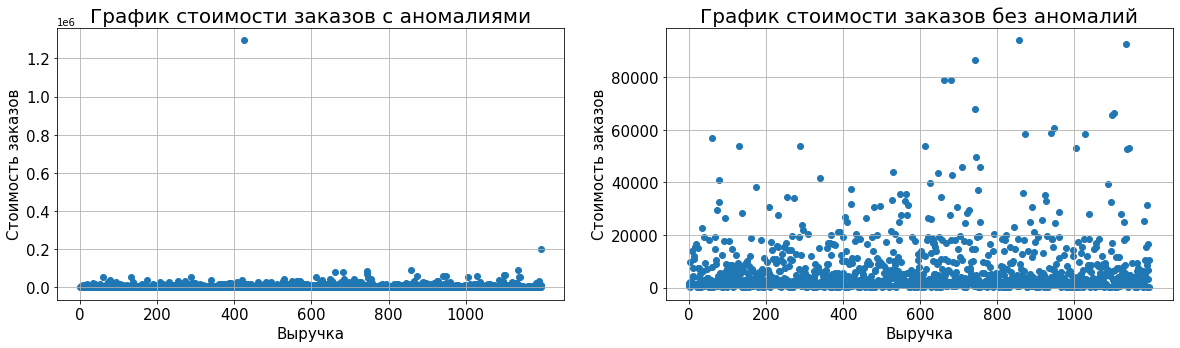

In [ ]:
# c аномалиями
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 2, 1)
x_values = pd.Series(range(0, len(orders['revenue'])))
ax1.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов c аномалиями', fontsize=20)
plt.ylabel('Стоимость заказов', fontsize=15)
plt.xlabel('Выручка', fontsize=15)
plt.xticks(np.arange(min(x_values), max(x_values), 200))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
# без аномалий
ax2 = plt.subplot(1, 2, 2, sharex=ax1)
y_values = orders[orders['revenue'] < 200000]['revenue']
x_values = pd.Series(range(0, len(y_values)))
ax2.scatter(x_values, y_values)
plt.title('График стоимости заказов без аномалий', fontsize=20)
plt.ylabel('Стоимость заказов', fontsize=15)
plt.xlabel('Выручка', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

***ВЫВОД:*** На первом графике видим выявленный ранее аномальный заказ 425 на 1.3 млн и выделяется еще один на 200 тысяч. Из за них мы наблюдали скачки метрик в группе В. Граница отсечения должна быть меньше 200 000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [ ]:
print(np.percentile(orders['revenue'], [95, 97.5, 99]))

[28000.  39530.  58233.2]


***ВЫВОД:*** Можно отсечь значения количества заказов, превышающих 40000

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [ ]:
# Создадим функцию для создания переменнх ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']
def ordersByUsers(orders):
    ordersByUsersA = (
        orders[orders['group'] == 'A']
        .groupby('visitorId', as_index=False)
        .agg({'transactionId': pd.Series.nunique})
    )
    ordersByUsersA.columns = ['userId', 'orders']

    ordersByUsersB = (
        orders[orders['group'] == 'B']
        .groupby('visitorId', as_index=False)
        .agg({'transactionId': pd.Series.nunique})
    )
    ordersByUsersB.columns = ['userId', 'orders']
    return ordersByUsersA, ordersByUsersB

# Создадим функцию для проверки гипотез
def hypothesis(sampleA, sampleB, alpha=0.05):

    p_value = float("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями значимая разница. p_value={}'.format(p_value))
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. p_value={}'.format(p_value))

    p_value = float("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

    if p_value < alpha:
        print('Разница между группой В и группой А меньше уровня значимости. p_value={}'.format(p_value))
    else:
        print('Разница между группой В и группой А не меньше уровня значимости. p_value={}'.format(p_value))

***Нулевая гипотеза:*** Различие в среднем количестве заказов на посетителя между группами по сырым данным не значимо

***Альтернативная гипотеза:*** Различие в среднем количестве заказов на посетителя между группами по сырым данным значимо

Прмем уровень статитической значимости 0,05

In [ ]:
# создадим переменные ordersByUsersA и ordersByUsersB
ordersByUsersA, ordersByUsersB = ordersByUsers(orders)
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index = np.arange(
                cumDF[cumDF['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index = np.arange(
                cumDF[cumDF['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# Проверим гипотезу
hypothesis(sampleA, sampleB)

Отвергаем нулевую гипотезу: между долями значимая разница. p_value=0.017
Разница между группой В и группой А не меньше уровня значимости. p_value=0.138


***ВЫВОД:*** p_value равен 0.017. Т.к. это меньше заданного уровня значимости, то нулевую гипотезу отвергаем.
Значит разница в среднем количестве заказов на посетителя между группами есть и разница на графике почти 14%  не случайность.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

***Нулевая гипотеза:*** Различие в среднем чеке заказа между группами по сырым данным статистически не значимо

***Альтернативная гипотеза:*** Различие в среднем чеке заказа между группами по сырым данным статистически значимо

Прмем уровень статитической значимости 0,05

In [ ]:
sampleA = orders[orders['group']=='A']['revenue']
sampleB = orders[orders['group']=='B']['revenue']

hypothesis(sampleA, sampleB)

Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. p_value=0.729
Разница между группой В и группой А не меньше уровня значимости. p_value=0.259


***ВЫВОД:*** Здесь не получилось отвергнуть нулевую гипотезу, значит различие в среднем чеке заказа между группами носит случайный характер.
Разница между группой В и группой А случайна и составила 0.259.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Сначала подготовим выборки количества заказов по пользователям. Все кто совершил больше 3 заказов или заказы дороже 40000 будем считать аномальными. Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
dtype: int64
34


Всего 34 аномальных пользователя.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста. Затем вызовем нашу функцию для проверки гипотезы.

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumDF[cumDF['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumDF[cumDF['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

hypothesis(sampleAFiltered, sampleBFiltered)

Отвергаем нулевую гипотезу: между долями значимая разница. p_value=0.009
Разница между группой В и группой А не меньше уровня значимости. p_value=0.164


Результаты по среднему количеству заказов практически не изменились.
По очищенным данным p_value уменьшился с 0.017 до 0.009.

Относительный прирост группы В к группе А увеличился с 0.138 до 0.164

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Посмотрим произошло ли что-нибудь с результатами по среднему чеку? Подготовим выборки по группам теста.

In [ ]:
sampleAFiltered = orders[
    np.logical_not(orders['visitorId'].isin(abnormalUsers)) & (orders['group'] == 'A')
]['revenue']

sampleBFiltered = orders[
    np.logical_not(orders['visitorId'].isin(abnormalUsers)) & (orders['group'] == 'B')
]['revenue']

hypothesis(sampleAFiltered, sampleBFiltered)

Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. p_value=0.711
Разница между группой В и группой А не меньше уровня значимости. p_value=0.06


***ВЫВОД:***
P-value уменьшился до 0.711 , был 0.729,
Делаем вывод, что статистической разницы меду сырыми и очищенными данными нет. Относительный прирост группы В к группе А уменьшился с 0.259 до 0.06

## Решение по результатам теста.

Имеющиеся факты:
- Прибыль растет на протяжении всего периода исследования для обеих групп, но для группы В растет быстрей, кумулятивный средний чек тоже вырос неравномерно.
- Среднее количество заказов на посетителя группы В к группе А ниже только вначале со 2.08 по 6.08, а потом резко идет вверх и практически не снижается.
- Выявили наличие аномалий в данных: два больших заказа и у некоторых клиентов большое количество заказов.
- Расчет статистической значимости  различий в среднем чеке заказа между группами по «очищенным» и "сырым" данным показал, что статистической разницы нет. p_value уменьшился с 72.9% до 71.1%. Относительный прирост группы В к группе А уменьшился с 26% до 6%.
- Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» и "сырым" данным показал, что аномалии в данных значимо не повлияли на статистическую значимость. По очищенным данным p_value уменьшился с 1.7% до 0.9% Относительный прирост группы В к группе А увеличился с 13.8% до 16.4%

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Группа B значительно эффективнее группы A.